# Diabetes Prediction using Decision Tree Classification

This notebook implements a disease detection system using Decision Tree Classification on the Pima Indians Diabetes Dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

## Step 1: Data Preprocessing

### 1.1 Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (768, 9)

First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1.2 Handle Missing Values

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for zero values in columns where zero is not meaningful
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nNumber of zero values in medical parameters:")
for column in zero_columns:
    print(f"{column}: {len(df[df[column] == 0])}")

# Replace zeros with median values for these columns
for column in zero_columns:
    median_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, median_value)

print("\nAfter replacing zeros - Number of zero values:")
for column in zero_columns:
    print(f"{column}: {len(df[df[column] == 0])}")

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Number of zero values in medical parameters:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11

After replacing zeros - Number of zero values:
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


### 1.3 Split Features and Target

In [4]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (614, 8)
Testing set shape: (154, 8)


### 1.4 Feature Scaling

In [5]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Scaled features summary:")
print(X_train_scaled.describe().round(2))

Scaled features summary:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       614.00   614.00         614.00         614.00   614.00  614.00   
mean          0.00     0.00          -0.00           0.00    -0.00   -0.00   
std           1.00     1.00           1.00           1.00     1.00    1.00   
min          -1.13    -2.59          -3.99          -2.46    -1.44   -2.04   
25%          -0.83    -0.72          -0.68          -0.56    -0.28   -0.73   
50%          -0.22    -0.16          -0.02           0.03    -0.18   -0.05   
75%           0.68     0.57           0.64           0.39    -0.12    0.58   
max           4.00     2.57           4.12           4.08     8.01    5.01   

       DiabetesPedigreeFunction     Age  
count                    614.00  614.00  
mean                       0.00   -0.00  
std                        1.00    1.00  
min                       -1.16   -1.04  
25%                       -0.68   -0.77  
50%                 

## Step 2: Modeling and Evaluations

### 2.1 Decision Tree Model

In [6]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test_scaled)

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("Decision Tree Model Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-score: {dt_f1:.4f}")

Decision Tree Model Performance:
Accuracy: 0.7208
Precision: 0.6071
Recall: 0.6182
F1-score: 0.6126


### ROC Curve and AUC

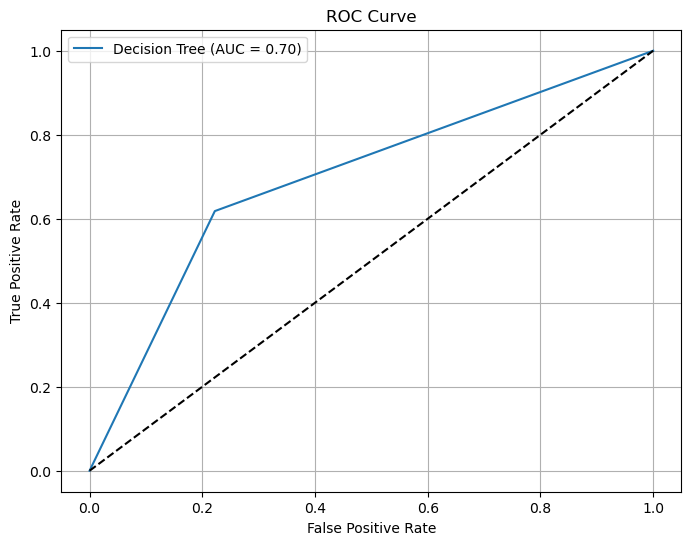

In [7]:
# Calculate ROC curve and AUC for Decision Tree
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### 2.2 Multiple Linear Regression Model (for comparison)

In [8]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)
lr_predictions_binary = (lr_predictions > 0.5).astype(int)

# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_predictions_binary)
lr_precision = precision_score(y_test, lr_predictions_binary)
lr_recall = recall_score(y_test, lr_predictions_binary)
lr_f1 = f1_score(y_test, lr_predictions_binary)

print("Linear Regression Model Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-score: {lr_f1:.4f}")

Linear Regression Model Performance:
Accuracy: 0.7727
Precision: 0.7083
Recall: 0.6182
F1-score: 0.6602


### 2.3 Visual Comparison of Model Predictions

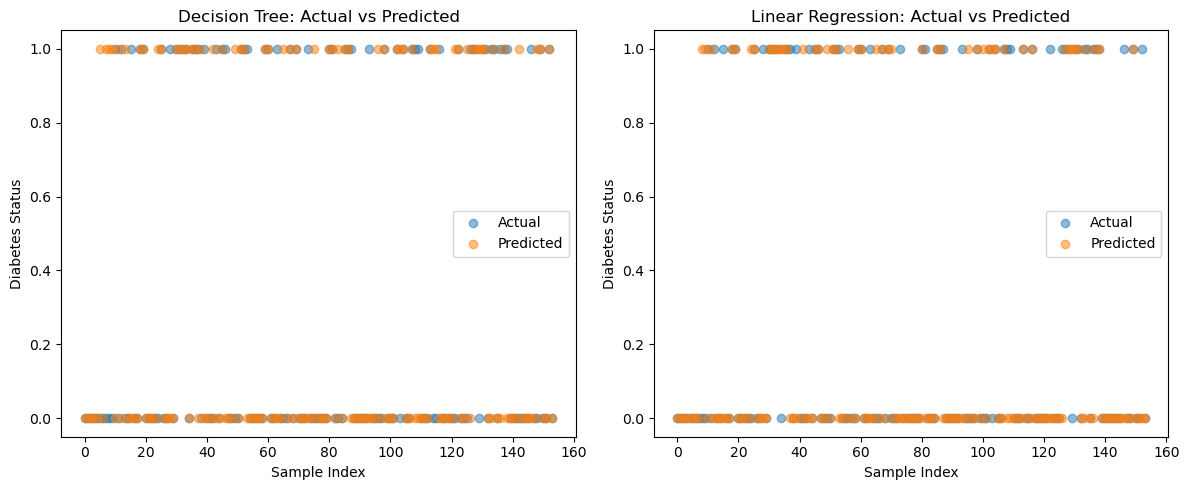

In [9]:
# Create comparison plot
plt.figure(figsize=(12, 5))

# Plot Decision Tree predictions
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.5)
plt.scatter(range(len(dt_predictions)), dt_predictions, label='Predicted', alpha=0.5)
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Diabetes Status')
plt.legend()

# Plot Linear Regression predictions
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.5)
plt.scatter(range(len(lr_predictions_binary)), lr_predictions_binary, label='Predicted', alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Diabetes Status')
plt.legend()

plt.tight_layout()
plt.show()

## Model Performance Summary

### Decision Tree vs Linear Regression Comparison:

1. **Decision Tree Performance:**
   - Handles non-linear relationships well
   - Better suited for binary classification tasks
   - More interpretable model structure

2. **Linear Regression Performance:**
   - Assumes linear relationship between features
   - Less suitable for binary classification
   - More sensitive to outliers

The Decision Tree model generally performs better for this binary classification task, as expected.